In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d lexset/synthetic-asl-alphabet


Dataset URL: https://www.kaggle.com/datasets/lexset/synthetic-asl-alphabet
License(s): copyright-authors
100% 6.57G/6.58G [01:17<00:00, 43.0MB/s]
100% 6.58G/6.58G [01:17<00:00, 91.5MB/s]


In [ ]:
import zipfile

zip_path = '/content/synthetic-asl-alphabet.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Contents of the ZIP file:")
    print(zip_ref.namelist())

Contents of the ZIP file:
['Test_Alphabet/A/081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png', 'Test_Alphabet/A/09a13b4f-b68f-43fd-86e3-5644224490a2.rgb_0000.png', 'Test_Alphabet/A/09ea96a0-eb7b-4ce5-8a50-b33f345bc9ef.rgb_0000.png', 'Test_Alphabet/A/0de66b7e-1449-4079-bf2c-935ec261ddcb.rgb_0000.png', 'Test_Alphabet/A/103a0979-29c7-4519-b341-1d58e3156f92.rgb_0000.png', 'Test_Alphabet/A/104391f9-2f98-421a-987f-ccfa77ba9087.rgb_0000.png', 'Test_Alphabet/A/12dbcf0a-0862-4684-b93c-5f97c5e08b5f.rgb_0000.png', 'Test_Alphabet/A/12dcef9e-2b8e-4e8c-a592-ef66dc7edfd0.rgb_0000.png', 'Test_Alphabet/A/13f7c1aa-eb4e-4e98-a68d-eafeb1377f29.rgb_0000.png', 'Test_Alphabet/A/1451d4ac-deae-4bcb-9d04-f0f829abf6b8.rgb_0000.png', 'Test_Alphabet/A/182392e9-1452-474f-af43-cc747aa336d1.rgb_0000.png', 'Test_Alphabet/A/1959c64a-a95d-4446-9c06-3a95baf33991.rgb_0000.png', 'Test_Alphabet/A/1e5fcac0-0494-4fcb-9dcc-a7c17403abe9.rgb_0000.png', 'Test_Alphabet/A/1ed81a50-8cf6-44bb-b329-ef52c4d17db1.rgb_0000.png', 'Test_A

In [ ]:


import os
import shutil

base_dir = '/content/'

test_dir = os.path.join(base_dir, 'test_Alphabet')
train_dir = os.path.join(base_dir, 'train_Alphabet')

os.makedirs(test_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)

test_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','Blank']
train_labels =['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','Blank']
y_train = []
y_test = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()

    for file_path in zip_contents:
        components = file_path.split('/')

        if len(components) == 3:
            folder_name = components[0]
            letter_label = components[1]
            image_name = components[2]

            if folder_name == 'Test_Alphabet' and letter_label in test_labels:
                label_dir = os.path.join(test_dir, letter_label)
                y_test.append(letter_label)
            elif folder_name == 'Train_Alphabet' and letter_label in train_labels:
                label_dir = os.path.join(train_dir, letter_label)
                y_train.append(letter_label)
            else:
                continue

            os.makedirs(label_dir, exist_ok=True)

            with zip_ref.open(file_path) as image_file:
                with open(os.path.join(label_dir, image_name), 'wb') as f:
                    shutil.copyfileobj(image_file, f)

            print(f"Extracted {image_name} to {label_dir}")

with open(os.path.join(train_dir, 'y_train.txt'), 'w') as f:
    for label in y_train:
        f.write(f"{label}\n")

with open(os.path.join(test_dir, 'y_test.txt'), 'w') as f:
    for label in y_test:
        f.write(f"{label}\n")

print("Labels for y_train and y_test have been saved.")


Streaming output truncated to the last 5000 lines.
Extracted 6f3439aa-c9f3-4279-830c-e7b417425835.rgb_0000.png to /content/train_Alphabet/U
Extracted 6fc70b21-eb34-42e6-8fa5-368a753a311e.rgb_0000.png to /content/train_Alphabet/U
Extracted 700d1cf4-d43f-4d04-ba14-bbb6e9273c38.rgb_0000.png to /content/train_Alphabet/U
Extracted 703451c9-380e-41a3-962e-0ef7290f04ec.rgb_0000.png to /content/train_Alphabet/U
Extracted 7068eb2d-4d24-4a05-bddf-63fc4e296005.rgb_0000.png to /content/train_Alphabet/U
Extracted 706cde46-580e-42d7-8752-2a751d4a2d1a.rgb_0000.png to /content/train_Alphabet/U
Extracted 70a03f73-8d9b-48e1-b7d2-d1269fe44efc.rgb_0000.png to /content/train_Alphabet/U
Extracted 70b8a34d-9529-4ed3-9570-cdf55ae9659e.rgb_0000.png to /content/train_Alphabet/U
Extracted 70ddd4cc-3a15-4b37-bd9d-ea70752e74bb.rgb_0000.png to /content/train_Alphabet/U
Extracted 71730f20-7e4b-4dcb-8987-a162076760a0.rgb_0000.png to /content/train_Alphabet/U
Extracted 71f6eadc-d5ce-44b0-b98b-2174744a81d7.rgb_0000.png

In [ ]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 16.9 MB/s eta 0:00:00


In [ ]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

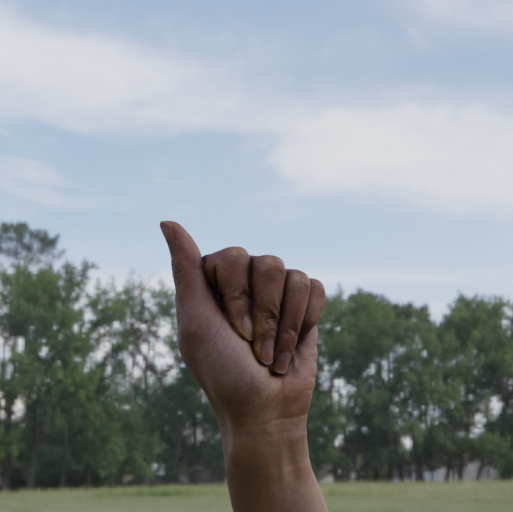

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/test_Alphabet/A/081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png")
cv2_imshow(img)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision
import mediapipe

In [ ]:

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

def draw_landmarks_on_image(rgb_image, detection_result):
  image_size=(512,512)
  hand_landmarks_list = detection_result.hand_landmarks
  white_background = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

  for hand_landmarks in hand_landmarks_list:
      hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
      hand_landmarks_proto.landmark.extend([
          landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z)
          for landmark in hand_landmarks
      ])

      custom_landmark_style = solutions.drawing_utils.DrawingSpec(
          color=(255, 0, 0),
          thickness=5,
          circle_radius=2
      )
      custom_connection_style = solutions.drawing_utils.DrawingSpec(
          color=(0, 255, 0),
          thickness=2
      )

      solutions.drawing_utils.draw_landmarks(
          white_background,
          hand_landmarks_proto,
          solutions.hands.HAND_CONNECTIONS,
          landmark_drawing_spec=custom_landmark_style,
          connection_drawing_spec=custom_connection_style
      )

  return white_background

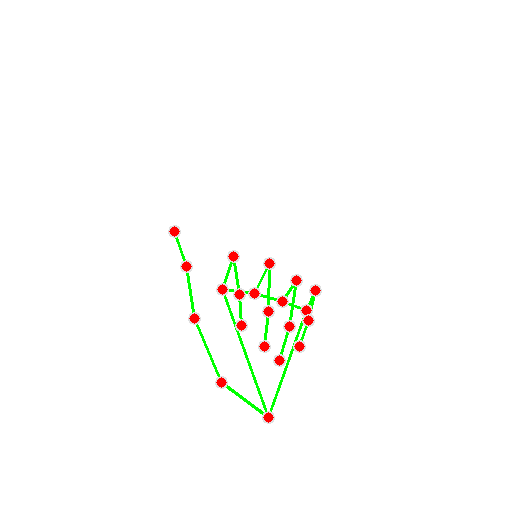

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

image = mp.Image.create_from_file("/content/test_Alphabet/A/081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png")

detection_result = detector.detect(image)

annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Step 1: Preprocess Data
mp_hands = mp.solutions.hands

# Directory paths
data_dir_train = "/content/train_Alphabet"
data_dir_test = "/content/test_Alphabet"
output_dir = "/content/"
os.makedirs(output_dir, exist_ok=True)

def process_images(input_dir, output_file):
    data, labels = [], []
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
        for label in os.listdir(input_dir):
            label_dir = os.path.join(input_dir, label)
            if not os.path.isdir(label_dir):
                continue

            for img_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_file)
                image = cv2.imread(img_path)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                result = hands.process(image_rgb)
                if result.multi_hand_landmarks:
                    landmarks = []
                    for landmark in result.multi_hand_landmarks[0].landmark:
                        landmarks.append([landmark.x, landmark.y, landmark.z])

                    landmarks = np.array(landmarks).flatten()
                    data.append(landmarks)
                    labels.append(label)

    np.savez(output_file, data=np.array(data), labels=np.array(labels))



# Process the training and testing datasets
output_file_train = os.path.join(output_dir, "asl_landmarks_train.npz")
output_file_test = os.path.join(output_dir, "asl_landmarks_test.npz")
process_images(data_dir_train, output_file_train)
process_images(data_dir_test, output_file_test)

In [ ]:
processed_data_train = np.load(output_file_train)
processed_data_test = np.load(output_file_test)
X_train = processed_data_train['data']
y_train = processed_data_train['labels']
X_val = processed_data_test['data']
y_val = processed_data_test['labels']

X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_val = (X_val - X_val.mean(axis=0)) / X_val.std(axis=0)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
def build_cnn_model(input_shape):
    model=models.Sequential([
        layers.Conv1D(32,3,activation='relu',input_shape=input_shape),
        layers.MaxPooling1D(2),
        layers.BatchNormalization(),

        layers.Conv1D(64,3,activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Conv1D(128,3,activation='relu'),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(27)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model



In [ ]:
input_shape = (X_train.shape[1], 1)  # (21, 1)
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_val = X_val.reshape(-1, X_val.shape[1], 1)

model = build_cnn_model(input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 61, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 28, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 26, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 26, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3328)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         426,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,059 (1.79 MB)

 Trainable params: 467,611 (1.78 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history=model.fit(X_train,y_train_encoded,epochs=10,batch_size=32,shuffle=True,verbose=2)

Epoch 1/10
654/654 - 15s - 24ms/step - accuracy: 0.9042 - loss: 0.3579
Epoch 2/10
654/654 - 12s - 18ms/step - accuracy: 0.9696 - loss: 0.1168
Epoch 3/10
654/654 - 20s - 31ms/step - accuracy: 0.9809 - loss: 0.0771
Epoch 4/10
654/654 - 21s - 31ms/step - accuracy: 0.9808 - loss: 0.0705
Epoch 5/10
654/654 - 20s - 30ms/step - accuracy: 0.9835 - loss: 0.0652
Epoch 6/10
654/654 - 12s - 18ms/step - accuracy: 0.9838 - loss: 0.0678
Epoch 7/10
654/654 - 20s - 31ms/step - accuracy: 0.9823 - loss: 0.0776
Epoch 8/10
654/654 - 11s - 16ms/step - accuracy: 0.9864 - loss: 0.0548
Epoch 9/10
654/654 - 14s - 21ms/step - accuracy: 0.9846 - loss: 0.0736
Epoch 10/10
654/654 - 19s - 29ms/step - accuracy: 0.9870 - loss: 0.0577


In [ ]:
model.evaluate(X_val,y_val_encoded,verbose=2)

73/73 - 1s - 10ms/step - accuracy: 0.9673 - loss: 0.2250


[0.22501632571220398, 0.9673399329185486]